In [1]:
import torch 
import torchvision
from PIL import Image as Image
from pathlib import Path, PurePath
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

# RESNET50 + R-CNN

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.cuda()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [ ]:
model.backbone.

In [3]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [4]:
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

In [30]:
def show_detection(pred, file):
    
    print("\n*************************"+
          "\n******* Detection *******\n"+
         "*************************\n")
    
    print("File ", file)
    
    if len(pred[0]["scores"].data) != 0:
        
        img = Image.open(file)
        _, inx = torch.max(pred[0]["scores"], dim = 0)
        label = pred[0]["labels"][inx]
        bb = pred[0]["boxes"][inx].data

        x = int(bb[0] - 150)
        y = int(bb[1] - 150)
        w = int(bb[2]-bb[0] + 300)
        h = int(bb[3]-bb[1] + 300)

        rect = patches.Rectangle((bb[0], bb[1]),
                                 bb[2]-bb[0], 
                                 bb[3]-bb[1],
                                 linewidth=2,edgecolor='r',facecolor='none')
        fig,ax = plt.subplots(1)
        ax.imshow(img)
        ax.add_patch(rect)
        plt.show()

        img = mpimg.imread(file)
        plt.imshow(img[y:(y+h), x:x+w])
        plt.show()

        sm = torch.nn.Softmax(dim = 0)
        probs = sm(pred[0]["scores"])

        print("*\n*Classes Scores:{}\n*Class Score:{}\n*Labels:{}\n*Label:{}\n*Locations:{}\n*Location:{}\n\033[1m*PD\033[0m:{}\n\033[1m*Probability:{:.3f}\033[0m".
              format(str(pred[0]["scores"].data)
                     , _,
                     str(pred[0]["labels"].data),
                     label,
                     str(pred[0]["boxes"].data),
                     bb, 
                     str(probs.data), 
                     torch.max(probs.data)))
    
    else:
        print("nothing detected")


*************************
******* Detection *******
*************************

File  1.jpg


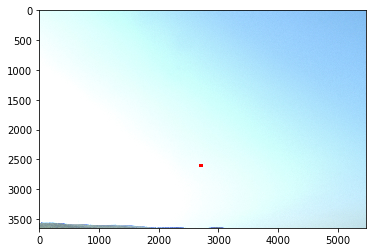

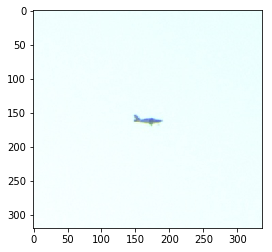

*
*Classes Scores:tensor([0.1754, 0.0741], device='cuda:0')
*Class Score:0.17543815076351166
*Labels:tensor([16, 38], device='cuda:0')
*Label:16
*Locations:tensor([[2694.3264, 2593.0913, 2731.6926, 2613.4983],
        [2695.0840, 2595.4451, 2731.7852, 2615.1709]], device='cuda:0')
*Location:tensor([2694.3264, 2593.0913, 2731.6926, 2613.4983], device='cuda:0')
*PD:tensor([0.5253, 0.4747], device='cuda:0')
*Probability:0.525
Time of execution1.27

*************************
******* Detection *******
*************************

File  2.jpg
nothing detected
Time of execution1.26

*************************
******* Detection *******
*************************

File  3.jpg
nothing detected
Time of execution1.23

*************************
******* Detection *******
*************************

File  5.jpg
nothing detected
Time of execution1.17

*************************
******* Detection *******
*************************

File  4.jpg


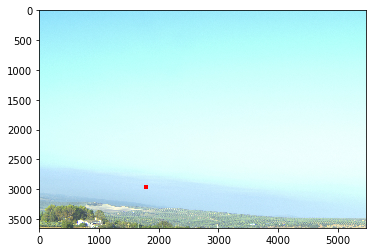

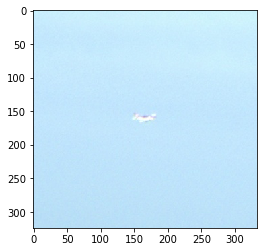

*
*Classes Scores:tensor([0.0604], device='cuda:0')
*Class Score:0.06036999449133873
*Labels:tensor([38], device='cuda:0')
*Label:38
*Locations:tensor([[1774.7377, 2952.3264, 1808.1809, 2976.9983]], device='cuda:0')
*Location:tensor([1774.7377, 2952.3264, 1808.1809, 2976.9983], device='cuda:0')
*PD:tensor([1.], device='cuda:0')
*Probability:1.000
Time of execution1.17


In [31]:
with torch.no_grad():
    for file in Path("./").iterdir():
        if PurePath(file).suffix == ".jpg":
            
            img = Image.open(file)
            transform = torchvision.transforms.Compose(
                                    [torchvision.transforms.ToTensor()])
            
            tensor = transform(img).unsqueeze(0).cuda()
            
            start.record()
            
            
            pred = model(tensor)

            end.record()
            torch.cuda.synchronize()
            
            
            show_detection(pred, 
                           file)
            
            print("Time of execution{:.2f}".format(start.elapsed_time(end)*0.001))


*************************
******* Detection *******
*************************

File  1.jpg


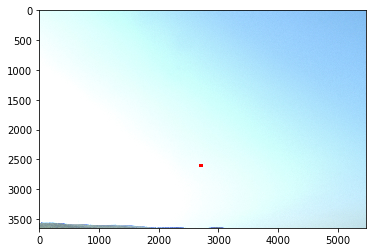

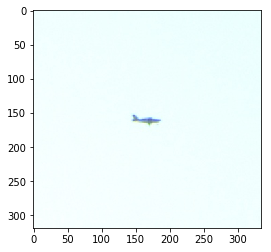

*
*Classes Scores:tensor([0.4035, 0.1779, 0.1427], device='cuda:0')
*Class Score:0.4035166800022125
*Labels:tensor([38, 16,  5], device='cuda:0')
*Label:38
*Locations:tensor([[2697.4729, 2594.2883, 2731.7710, 2613.6172],
        [2695.3926, 2596.1792, 2731.5056, 2612.0906],
        [2696.3630, 2593.0898, 2731.9890, 2611.5608]], device='cuda:0')
*Location:tensor([2697.4729, 2594.2883, 2731.7710, 2613.6172], device='cuda:0')
*PD:tensor([0.3893, 0.3107, 0.3000], device='cuda:0')
*Probability:0.389
Time of execution1.28

*************************
******* Detection *******
*************************

File  2.jpg


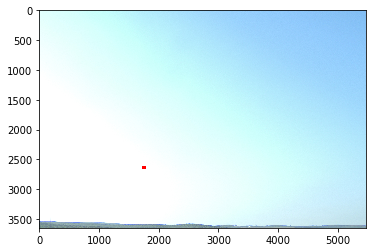

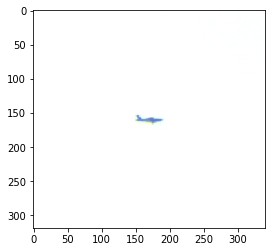

*
*Classes Scores:tensor([0.2282, 0.1487, 0.0847], device='cuda:0')
*Class Score:0.22823326289653778
*Labels:tensor([38,  5, 16], device='cuda:0')
*Label:38
*Locations:tensor([[1737.8450, 2631.3088, 1777.9893, 2650.9861],
        [1740.2465, 2630.8665, 1775.8909, 2648.7173],
        [1736.9333, 2631.3691, 1778.9017, 2650.5364]], device='cuda:0')
*Location:tensor([1737.8450, 2631.3088, 1777.9893, 2650.9861], device='cuda:0')
*PD:tensor([0.3584, 0.3310, 0.3105], device='cuda:0')
*Probability:0.358
Time of execution1.26

*************************
******* Detection *******
*************************

File  3.jpg


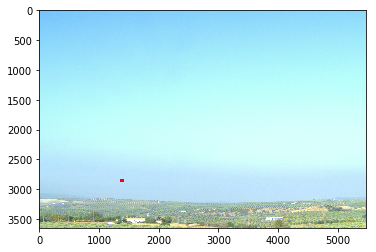

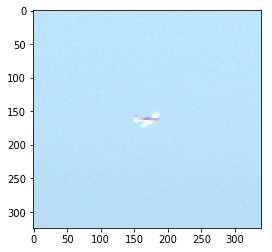

*
*Classes Scores:tensor([0.1956, 0.1141, 0.0925], device='cuda:0')
*Class Score:0.19563835859298706
*Labels:tensor([38,  3, 16], device='cuda:0')
*Label:38
*Locations:tensor([[1365.8406, 2844.2595, 1406.0250, 2869.1587],
        [1286.9661, 3504.9041, 1388.6298, 3579.8557],
        [1365.1187, 2843.9541, 1406.6516, 2868.4868]], device='cuda:0')
*Location:tensor([1365.8406, 2844.2595, 1406.0250, 2869.1587], device='cuda:0')
*PD:tensor([0.3541, 0.3264, 0.3194], device='cuda:0')
*Probability:0.354
Time of execution1.18

*************************
******* Detection *******
*************************

File  5.jpg


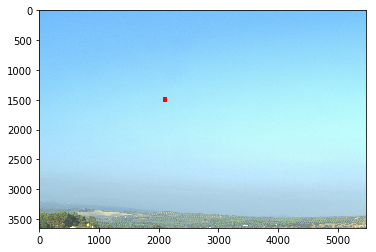

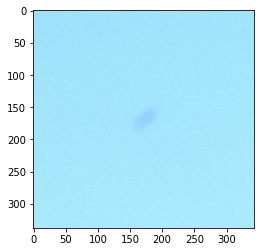

*
*Classes Scores:tensor([0.3603, 0.2822, 0.0615], device='cuda:0')
*Class Score:0.36031898856163025
*Labels:tensor([38, 16, 16], device='cuda:0')
*Label:38
*Locations:tensor([[2085.1592, 1474.0033, 2128.4331, 1512.4132],
        [2084.5024, 1473.8262, 2129.5098, 1512.4338],
        [3298.0803, 3064.1099, 3349.4382, 3086.3254]], device='cuda:0')
*Location:tensor([2085.1592, 1474.0033, 2128.4331, 1512.4132], device='cuda:0')
*PD:tensor([0.3750, 0.3468, 0.2782], device='cuda:0')
*Probability:0.375
Time of execution1.25

*************************
******* Detection *******
*************************

File  4.jpg


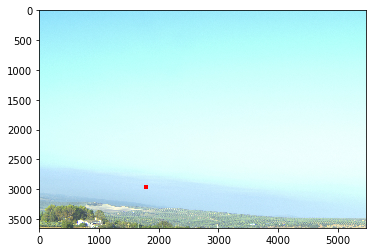

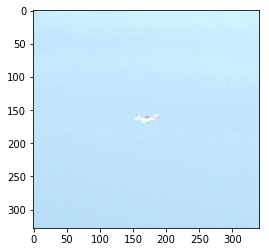

*
*Classes Scores:tensor([0.1617, 0.1115, 0.0982, 0.0832], device='cuda:0')
*Class Score:0.16170302033424377
*Labels:tensor([38,  3, 16,  8], device='cuda:0')
*Label:38
*Locations:tensor([[1769.8622, 2949.4839, 1811.7815, 2977.5281],
        [ 633.5612, 3469.3110, 1062.6918, 3638.9285],
        [1769.0027, 2946.2351, 1811.8325, 2974.7661],
        [ 623.1395, 3469.2095, 1064.7223, 3638.2908]], device='cuda:0')
*Location:tensor([1769.8622, 2949.4839, 1811.7815, 2977.5281], device='cuda:0')
*PD:tensor([0.2622, 0.2494, 0.2461, 0.2424], device='cuda:0')
*Probability:0.262
Time of execution1.20


In [32]:
with torch.no_grad():
    for file in Path("./").iterdir():
        if PurePath(file).suffix == ".jpg":
            
            img = Image.open(file)
            transform = torchvision.transforms.Compose(
                                    [torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
            
            tensor = transform(img).unsqueeze(0).cuda()
            
            start.record()
            
            
            pred = model(tensor)

            end.record()
            torch.cuda.synchronize()
            
            
            show_detection(pred, 
                           file)
            
            print("Time of execution{:.2f}".format(start.elapsed_time(end)*0.001))